In [159]:
#import custom module with defined functions
from kinase_module import *


In [88]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler

###### Define the functions

In [89]:

def add_gausian(y,mu,sigma):
    noise = np.random.normal(mu,sigma,[4175, 117])
    df_aug = df_train_set +noise 
    #df_new = pd.concat([df_train_set,df_aug])
    return(df_aug)

def drop_corr(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
    df_new = df.drop(df[to_drop],axis = 1)
    return(df_new)

def model_eval(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    #model_score = model.score(X_test,y_test)
    model_mse =  mse(y_test,pred)
    model_r2 =r2(y_test,pred)
    return(-model_mse, model_r2)

In [90]:

#Data frame
#pd.read_csv('~/Desktop/data/kinase_files/KinaseP00533.csv')
df = pd.read_csv('~/Desktop/data/kinase_files/KinaseP00533.csv')
df.head()

,Unnamed: 0,target_id,pAc,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,2609,P00533,1.60,C1=CC(=CC=C1CCC(=O)C2=C(C=C(C=C2O)O)O)O,2.3245,72.1947,114.921781,97.99,274.272,274.084124,...,0,0,0,2,0,0,0,0,0,0
1,2610,P00533,1.72,C1=CC(=C(C=C1/C=C/C(=O)C2=C(C(=C(C=C2)O[C@H]3[...,-0.4162,107.3029,180.820025,197.37,450.396,450.116212,...,0,0,0,3,0,0,0,0,0,0
2,2611,P00533,1.96,C[C@@H](C(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)...,3.3508,156.8052,240.763560,137.22,577.045,576.200029,...,0,0,1,4,0,0,0,0,2,1
3,2612,P00533,1.99,COC1=C(C=C(C(=C1)N2CCN(CC2)C(=O)N3CCNCC3)NC(=O...,3.4686,169.9561,259.003075,132.26,617.114,616.242563,...,0,0,1,5,0,0,0,0,2,1
4,2613,P00533,2.00,CN(C)CC(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)NC...,3.5316,163.6784,248.094102,120.23,590.088,589.231664,...,0,0,1,4,0,0,0,0,2,1


In [91]:
#Check the shape of the dataframe
df.shape

(4639, 120)

In [92]:
#Drop the highly correlated features
drop_corr(df).head()

,Unnamed: 0,target_id,smiles,SlogP,SMR,TPSA,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41
0,2609,P00533,C1=CC(=CC=C1CCC(=O)C2=C(C=C(C=C2O)O)O)O,2.3245,72.1947,97.99,5,4,4,4,...,0,0,0,0,2,0,0,0,0,0
1,2610,P00533,C1=CC(=C(C=C1/C=C/C(=O)C2=C(C(=C(C=C2)O[C@H]3[...,-0.4162,107.3029,197.37,11,8,6,8,...,0,0,0,0,3,0,0,0,0,0
2,2611,P00533,C[C@@H](C(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)...,3.3508,156.8052,137.22,12,3,8,3,...,0,0,0,1,4,0,0,0,0,2
3,2612,P00533,COC1=C(C=C(C(=C1)N2CCN(CC2)C(=O)N3CCNCC3)NC(=O...,3.4686,169.9561,132.26,13,3,7,3,...,0,0,0,1,5,0,0,0,0,2
4,2613,P00533,CN(C)CC(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)NC...,3.5316,163.6784,120.23,12,2,9,2,...,0,0,0,1,4,0,0,0,0,2


In [93]:
drop_corr(df).shape

(4639, 93)

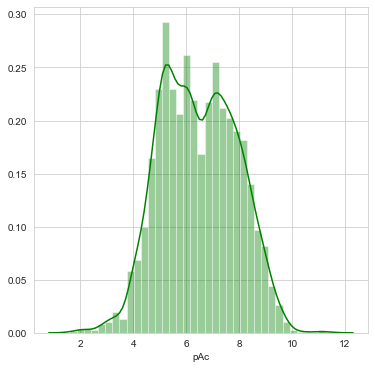

In [95]:
#Plot distribution of the pAc with the density estimation function
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df.pAc,color = 'green');
sns.set_style("whitegrid")

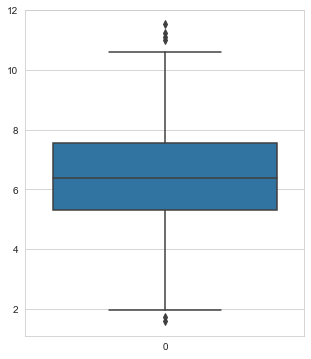

In [96]:
#Boxplot of pAc,It has a few outliers but the distribution in fairly normal
f, ax = plt.subplots(figsize=(5, 6))
sns.set_style("whitegrid")
data = df.pAc
sns.boxplot(data=data);

In [97]:
#Drop unwanted colum(unnamed)
df = df.drop(['Unnamed: 0','smiles','target_id'], axis=1)
df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,1.60,2.3245,72.1947,114.921781,97.99,274.272,274.084124,5,4,4,...,0,0,0,2,0,0,0,0,0,0
1,1.72,-0.4162,107.3029,180.820025,197.37,450.396,450.116212,11,8,6,...,0,0,0,3,0,0,0,0,0,0
2,1.96,3.3508,156.8052,240.763560,137.22,577.045,576.200029,12,3,8,...,0,0,1,4,0,0,0,0,2,1
3,1.99,3.4686,169.9561,259.003075,132.26,617.114,616.242563,13,3,7,...,0,0,1,5,0,0,0,0,2,1
4,2.00,3.5316,163.6784,248.094102,120.23,590.088,589.231664,12,2,9,...,0,0,1,4,0,0,0,0,2,1


###### Standardize the dataframe

In [98]:
# Get column names first
names = df.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,-3.395662,-1.375843,-1.536783,-1.407165,0.376955,-1.434036,-1.431595,-0.769461,1.452924,-0.668270,...,-0.108594,-0.101279,-0.831579,-1.218004,-0.185317,-0.025438,-0.025438,-0.040873,-1.106345,-0.809684
1,-3.311830,-3.261856,-0.334842,0.063333,3.600130,0.159783,0.163996,1.810921,4.592241,-0.023154,...,-0.108594,-0.101279,-0.831579,-0.142162,-0.185317,-0.025438,-0.025438,-0.040873,-1.106345,-0.809684
2,-3.144165,-0.669594,1.359887,1.400955,1.649295,1.305883,1.306846,2.240985,0.668095,0.621962,...,-0.108594,-0.101279,0.443692,0.933680,-0.185317,-0.025438,-0.025438,-0.040873,-0.047586,-0.058008
3,-3.123207,-0.588530,1.810113,1.807964,1.488428,1.668484,1.669800,2.671048,0.668095,0.299404,...,-0.108594,-0.101279,0.443692,2.009521,-0.185317,-0.025438,-0.025438,-0.040873,-0.047586,-0.058008
4,-3.116221,-0.545177,1.595193,1.564533,1.098261,1.423914,1.424967,2.240985,-0.116735,0.944519,...,-0.108594,-0.101279,0.443692,0.933680,-0.185317,-0.025438,-0.025438,-0.040873,-0.047586,-0.058008


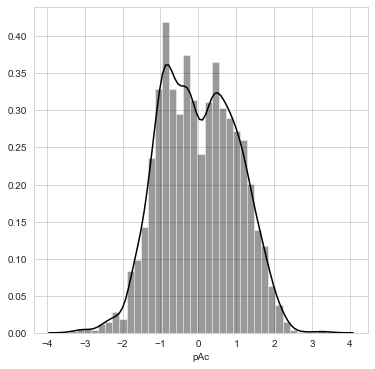

In [99]:
#Plot distribution of the pAc with the density estimation function after scaling
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(scaled_df.pAc,color = 'black');
sns.set_style("whitegrid")

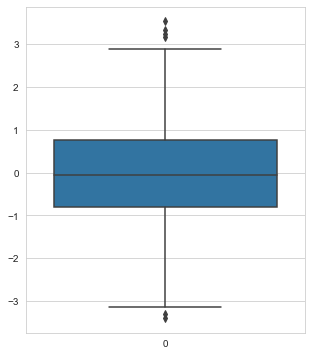

In [100]:
#Boxplot of pAc,It has a few outliers but the distribution in fairly normal
f, ax = plt.subplots(figsize=(5, 6))
sns.set_style("whitegrid")
data = scaled_df.pAc
sns.boxplot(data=data);

In [101]:
from tensorflow import set_random_seed
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [102]:
#-----------------------------------------------------------------------------
# Define custom loss functions for regression in Keras 
#-----------------------------------------------------------------------------

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [103]:
scaled_df.shape

(4639, 117)

In [104]:
# Get the feature vector
X = scaled_df.drop(columns=['pAc'],axis=1)
# Get the target vector
y = scaled_df["pAc"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [106]:
#Check the shape of the training and testing data 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((4175, 116), (464, 116), (4175,), (464,))

###### Add the X_train and y_train to form a a training set for augmentation

In [107]:
df_train_set = pd.concat([X_train, y_train], axis = 1)
df_train_set.head()

,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42,pAc
1554,-0.793558,0.536678,0.853800,3.254072,1.569963,1.558462,1.380857,3.022582,0.621962,3.548279,...,-0.101279,-0.831579,-1.218004,-0.185317,-0.025438,-0.025438,-0.040873,-1.106345,-0.809684,-0.550022
1736,-1.658122,-1.432417,-1.460322,1.043125,-1.421086,-1.422671,0.090667,3.022582,-1.313385,1.792964,...,-0.101279,0.443692,-1.218004,-0.185317,-0.025438,-0.025438,-0.040873,-0.047586,-0.058008,-0.423110
4285,0.756060,0.784706,0.916932,-0.226620,0.862081,0.862609,0.090667,-0.116735,1.267077,0.037649,...,-0.101279,0.443692,-0.142162,-0.185317,-0.025438,-0.025438,-0.040873,-1.106345,-0.809684,1.438665
149,-0.557962,-0.735686,-0.871705,-0.125106,-1.034848,-1.032089,-0.339397,-0.116735,-1.313385,-0.840009,...,-0.101279,0.443692,-0.142162,-0.185317,-0.025438,-0.025438,-0.040873,1.011173,0.693668,-1.719017
4609,0.090124,0.004003,0.017532,-0.226620,-0.007604,-0.007895,0.090667,-0.116735,0.621962,0.037649,...,-0.101279,-0.831579,-0.142162,-0.185317,-0.025438,-0.025438,-0.040873,-0.047586,-0.058008,2.172198


In [108]:
#Assign df0 to df_train_set
df0 = df_train_set

In [109]:
#The shape of the training set
df0.shape

(4175, 117)

In [114]:
# Get the feature vector
X0 = df0.drop(columns=['pAc'],axis=1).values
# Get the target vector
y0 = df0["pAc"].values

In [115]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3,random_state=42)

VALIDATION SET FOR EXTERNAL VALIDATION

In [135]:
X_test_val = X_test.values
y_test_val = y_test.values

In [117]:
#-----------------------------------------------------------------------------
# Start a simple Keras sequential model
#-----------------------------------------------------------------------------

# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
np.random.seed(12345)
# set the TF seed
set_random_seed(12345)
# Import data, assign seed for same results, do train/test split 80/20
#(x_train, y_train), (x_test, y_test) = boston_housing.load_data(seed=12345, test_split=0.2)

# built Keras sequential model 
model0 = Sequential()
# add batch normalization
model0.add(BatchNormalization())
# add layer to the MLP for data (404,13) 
model0.add(Dense(units=300, activation='relu', input_dim=X0_train.shape[1]))
# add output layer
model0.add(Dense(units=1, activation='relu'))
# compile regression model loss should be mean_squared_error //
model0.compile(optimizer='rmsprop', loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
# enable early stopping based on mean_squared_error
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# fit model
result = model0.fit(X0_train, y0_train, epochs=60, batch_size=5, validation_data=(X0_test, y0_test), callbacks=[earlystopping])
# get predictions
y_pred = model0.predict(X0_test)

W0710 16:39:12.380087 20672 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:39:12.528948 20672 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0710 16:39:12.557923 20672 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 16:39:12.845099 20672 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_a

Train on 2922 samples, validate on 1253 samples
Epoch 1/240
2922/2922 [==============================] - 2s 618us/step - loss: 0.9699 - mean_squared_error: 0.9699 - rmse: 0.8251 - r_square: -0.4909 - val_loss: 1.0253 - val_mean_squared_error: 1.0253 - val_rmse: 0.8445 - val_r_square: -0.5198
Epoch 2/240
2922/2922 [==============================] - 1s 467us/step - loss: 0.9758 - mean_squared_error: 0.9758 - rmse: 0.8276 - r_square: -0.7420 - val_loss: 0.9840 - val_mean_squared_error: 0.9840 - val_rmse: 0.8292 - val_r_square: -0.4388
Epoch 3/240
2922/2922 [==============================] - 1s 474us/step - loss: 0.9673 - mean_squared_error: 0.9673 - rmse: 0.8252 - r_square: -0.5814 - val_loss: 0.9966 - val_mean_squared_error: 0.9966 - val_rmse: 0.8338 - val_r_square: -0.4513
Epoch 4/240
2922/2922 [==============================] - 1s 456us/step - loss: 0.9570 - mean_squared_error: 0.9570 - rmse: 0.8201 - r_square: -0.5655 - val_loss: 1.0040 - val_mean_squared_error: 1.0040 - val_rmse: 0.8

2922/2922 [==============================] - 1s 489us/step - loss: 0.6966 - mean_squared_error: 0.6966 - rmse: 0.6639 - r_square: -0.3904 - val_loss: 0.7702 - val_mean_squared_error: 0.7702 - val_rmse: 0.7148 - val_r_square: -0.2060
Epoch 35/240
2922/2922 [==============================] - 2s 544us/step - loss: 0.6876 - mean_squared_error: 0.6876 - rmse: 0.6583 - r_square: -0.1764 - val_loss: 0.8603 - val_mean_squared_error: 0.8603 - val_rmse: 0.7318 - val_r_square: -0.4415
Epoch 36/240
2922/2922 [==============================] - 1s 435us/step - loss: 0.7060 - mean_squared_error: 0.7060 - rmse: 0.6719 - r_square: -0.2763 - val_loss: 0.7836 - val_mean_squared_error: 0.7836 - val_rmse: 0.7132 - val_r_square: -0.2308
Epoch 37/240
2922/2922 [==============================] - 1s 438us/step - loss: 0.6902 - mean_squared_error: 0.6902 - rmse: 0.6601 - r_square: -0.2150 - val_loss: 0.7577 - val_mean_squared_error: 0.7577 - val_rmse: 0.7074 - val_r_square: -0.2022
Epoch 38/240
2922/2922 [=====

2922/2922 [==============================] - 1s 427us/step - loss: 0.6626 - mean_squared_error: 0.6626 - rmse: 0.6422 - r_square: -0.1543 - val_loss: 0.7426 - val_mean_squared_error: 0.7426 - val_rmse: 0.6952 - val_r_square: -0.2008
Epoch 68/240
2922/2922 [==============================] - 1s 422us/step - loss: 0.6756 - mean_squared_error: 0.6756 - rmse: 0.6494 - r_square: -0.1457 - val_loss: 0.7488 - val_mean_squared_error: 0.7488 - val_rmse: 0.6946 - val_r_square: -0.2330
Epoch 69/240
2922/2922 [==============================] - 1s 422us/step - loss: 0.6766 - mean_squared_error: 0.6766 - rmse: 0.6519 - r_square: -0.1540 - val_loss: 0.7381 - val_mean_squared_error: 0.7381 - val_rmse: 0.6954 - val_r_square: -0.2000
Epoch 70/240
2922/2922 [==============================] - 2s 536us/step - loss: 0.6665 - mean_squared_error: 0.6665 - rmse: 0.6472 - r_square: -0.0673 - val_loss: 0.7288 - val_mean_squared_error: 0.7288 - val_rmse: 0.6900 - val_r_square: -0.1664
Epoch 71/240
2922/2922 [=====

2922/2922 [==============================] - 1s 444us/step - loss: 0.6589 - mean_squared_error: 0.6589 - rmse: 0.6394 - r_square: -0.1991 - val_loss: 0.7362 - val_mean_squared_error: 0.7362 - val_rmse: 0.6906 - val_r_square: -0.1734
Epoch 101/240
2922/2922 [==============================] - 1s 438us/step - loss: 0.6490 - mean_squared_error: 0.6490 - rmse: 0.6359 - r_square: -0.1300 - val_loss: 0.7452 - val_mean_squared_error: 0.7452 - val_rmse: 0.6912 - val_r_square: -0.1899
Epoch 102/240
2922/2922 [==============================] - 1s 491us/step - loss: 0.6507 - mean_squared_error: 0.6507 - rmse: 0.6356 - r_square: -0.2160 - val_loss: 0.7386 - val_mean_squared_error: 0.7386 - val_rmse: 0.6901 - val_r_square: -0.1900
Epoch 103/240
2922/2922 [==============================] - 1s 455us/step - loss: 0.6552 - mean_squared_error: 0.6552 - rmse: 0.6385 - r_square: -0.1210 - val_loss: 0.7378 - val_mean_squared_error: 0.7378 - val_rmse: 0.6929 - val_r_square: -0.1928
Epoch 104/240
2922/2922 [=

2922/2922 [==============================] - 1s 450us/step - loss: 0.6542 - mean_squared_error: 0.6542 - rmse: 0.6362 - r_square: -0.3480 - val_loss: 0.7258 - val_mean_squared_error: 0.7258 - val_rmse: 0.6883 - val_r_square: -0.1494
Epoch 00133: early stopping


#Wrap Function In KerasClassifier

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=model0, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

#Conduct k-Fold Cross-Validation Using scikit-learn

In [ ]:
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, Xtrain, y_train, cv=5)

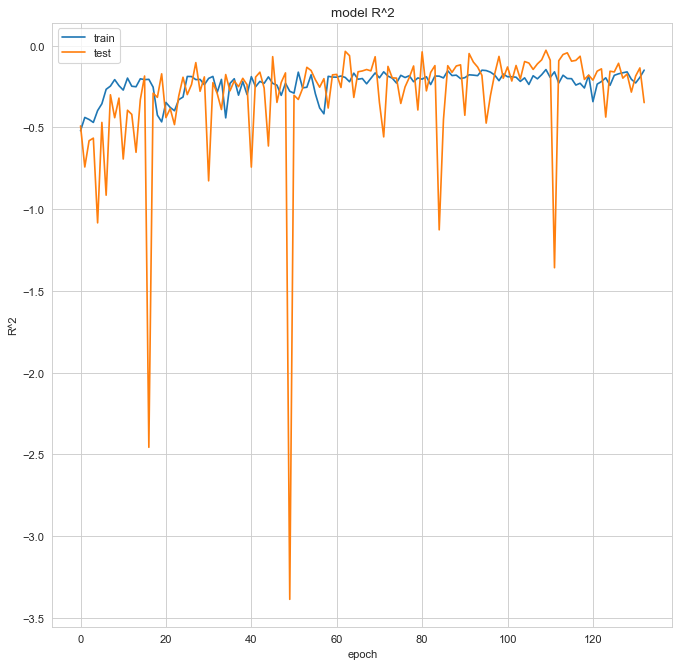

In [120]:
#-----------------------------------------------------------------------------
# Plot learning curves including R^2 and RMSE
#-----------------------------------------------------------------------------

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(result.history['val_r_square'])
plt.plot(result.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

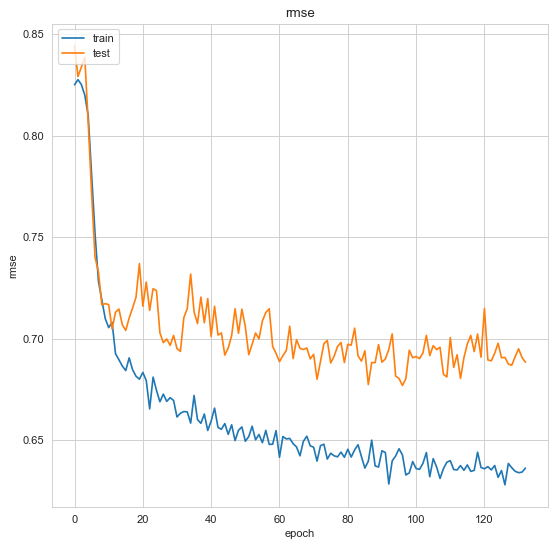

In [121]:
# plot training curve for rmse
plt.figure(figsize=(8, 8), dpi=80)
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

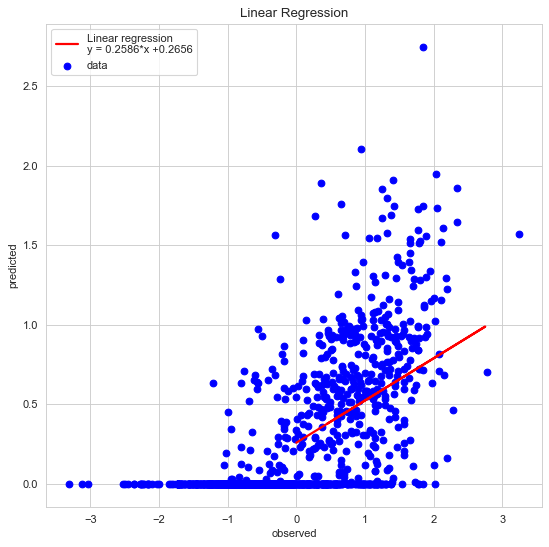

In [129]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y0_test.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y0_test, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [130]:
#-----------------------------------------------------------------------------
# print statistical figures of merit
#-----------------------------------------------------------------------------

import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y0_test,y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y0_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y0_test,y_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y0_test,y_pred))



Mean absolute error (MAE):      0.688346
Mean squared error (MSE):       0.725804
Root mean squared error (RMSE): 0.851942
R square (R^2):                 0.281244


###### Validation prediction 

In [137]:
valid_pred = model0.predict(X_test_val)

In [138]:
print("\n")
valid_pred = model0.predict(X_test_val)
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test_val,valid_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test_val,valid_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test_val,valid_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test_val,valid_pred))



Mean absolute error (MAE):      0.745948
Mean squared error (MSE):       0.832437
Root mean squared error (RMSE): 0.912380
R square (R^2):                 0.256441


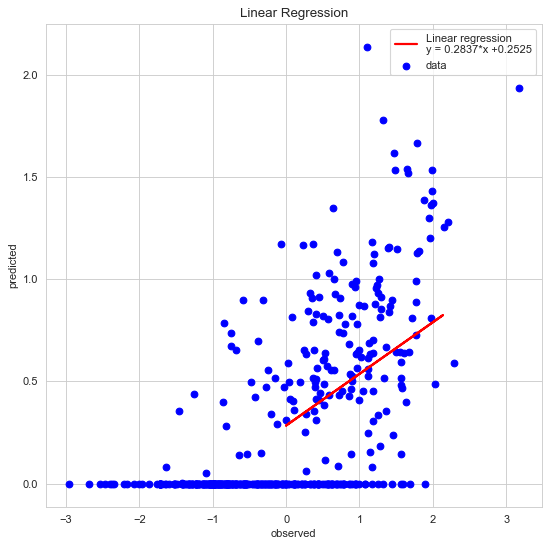

In [140]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test_val.reshape(-1,1), valid_pred)  
y_fit = regressor.predict(valid_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y_test_val, valid_pred, color='blue', label= 'data')
plt.plot(valid_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [143]:
#Add noise of 0.01 to the dataframe
noise = add_gausian(df0,0,0.1)
df1 = pd.concat([df0,noise])




df1.shape

(8350, 117)

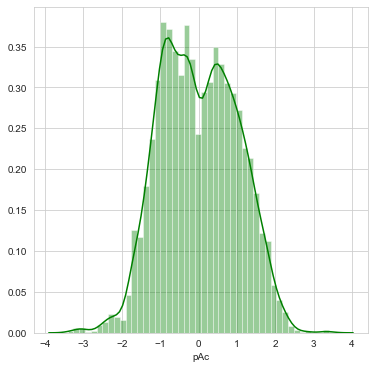

In [144]:
#Plot distribution of the pAc with the density estimation function after scaling
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df1.pAc,color = 'green');
sns.set_style("whitegrid")

In [145]:
# Get the feature vector
X1 = df1.drop(columns=['pAc'],axis=1).values
# Get the target vector
y1 = df1["pAc"].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)

###### Fit the training data after first round of noise addition and evaluate the model

In [146]:
#-----------------------------------------------------------------------------
# Start a simple Keras sequential model
#-----------------------------------------------------------------------------

# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
np.random.seed(12345)
# set the TF seed
set_random_seed(12345)
# Import data, assign seed for same results, do train/test split 80/20
# built Keras sequential model 
model1 = Sequential()
# add batch normalization
model1.add(BatchNormalization())
# add layer to the MLP for data (404,13) 
model1.add(Dense(units=300, activation='relu', input_dim=X1_train.shape[1]))
# add output layer
model1.add(Dense(units=1, activation='relu'))
# compile regression model loss should be mean_squared_error //
model1.compile(optimizer="'rmsprop'", loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
# enable early stopping based on mean_squared_error
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
# fit model
result = model1.fit(X1_train, y1_train, epochs=240, batch_size=5, validation_data=(X1_test, y1_test), callbacks=[earlystopping])
# get predictions
y1_pred = model1.predict(X1_test)

Train on 5845 samples, validate on 2505 samples
Epoch 1/240
5845/5845 [==============================] - 5s 839us/step - loss: 0.9835 - mean_squared_error: 0.9835 - rmse: 0.8303 - r_square: -0.5196 - val_loss: 1.0151 - val_mean_squared_error: 1.0151 - val_rmse: 0.8455 - val_r_square: -0.7365
Epoch 2/240
5845/5845 [==============================] - 4s 674us/step - loss: 0.9839 - mean_squared_error: 0.9839 - rmse: 0.8307 - r_square: -0.6280 - val_loss: 1.0154 - val_mean_squared_error: 1.0154 - val_rmse: 0.8454 - val_r_square: -0.7366
Epoch 3/240
5845/5845 [==============================] - 4s 632us/step - loss: 0.9835 - mean_squared_error: 0.9835 - rmse: 0.8314 - r_square: -0.6430 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 4/240
5845/5845 [==============================] - 4s 609us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.6025 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8

5845/5845 [==============================] - 4s 657us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.6022 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 35/240
5845/5845 [==============================] - 4s 631us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.5659 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 36/240
5845/5845 [==============================] - 3s 485us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.5943 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 37/240
5845/5845 [==============================] - 3s 565us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.4626 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 38/240
5845/5845 [=====

5845/5845 [==============================] - 3s 443us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.4659 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 68/240
5845/5845 [==============================] - 3s 474us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.7715 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 69/240
5845/5845 [==============================] - 3s 456us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.5951 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 70/240
5845/5845 [==============================] - 3s 435us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.5930 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 71/240
5845/5845 [=====

5845/5845 [==============================] - 3s 464us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.6697 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 101/240
5845/5845 [==============================] - 3s 442us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.6596 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 102/240
5845/5845 [==============================] - 2s 425us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.5832 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 103/240
5845/5845 [==============================] - 3s 440us/step - loss: 0.9834 - mean_squared_error: 0.9834 - rmse: 0.8313 - r_square: -0.5576 - val_loss: 1.0155 - val_mean_squared_error: 1.0155 - val_rmse: 0.8457 - val_r_square: -0.7373
Epoch 104/240
5845/5845 [=

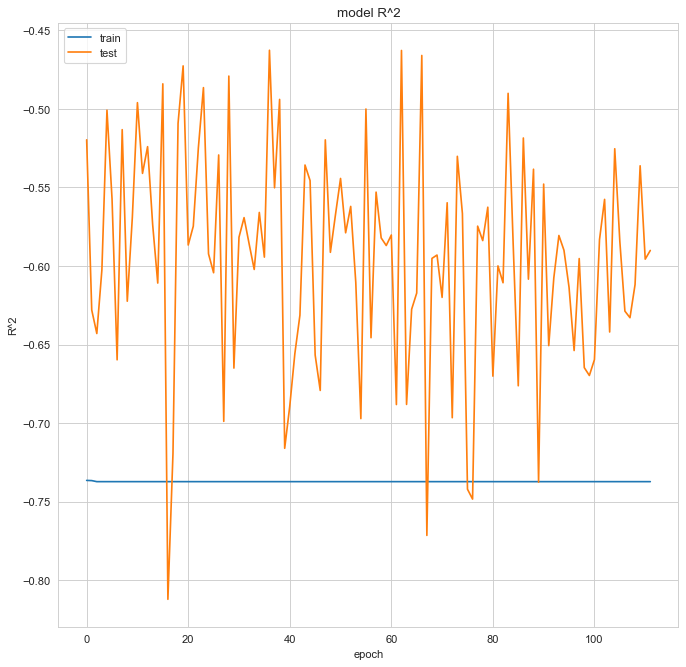

In [147]:
#-----------------------------------------------------------------------------
# Plot learning curves including R^2 and RMSE
#-----------------------------------------------------------------------------

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(result.history['val_r_square'])
plt.plot(result.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

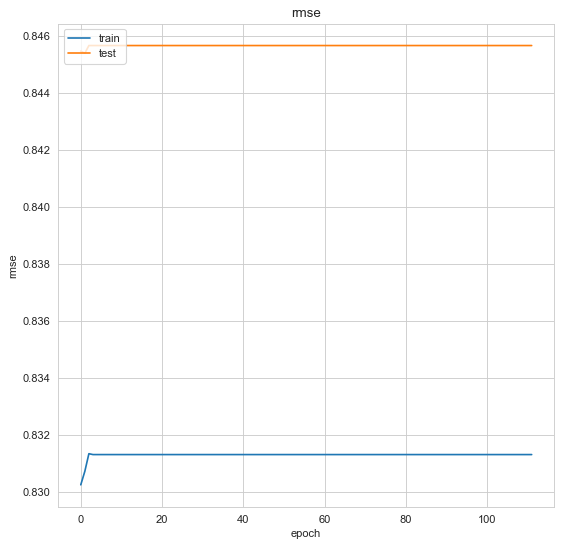

In [148]:
# plot training curve for rmse
plt.figure(figsize=(8, 8), dpi=80)
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [156]:
#-----------------------------------------------------------------------------
# print statistical figures of merit
#-----------------------------------------------------------------------------

import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y1_test,y1_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y1_test,y1_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y1_test,y1_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y1_test,y1_pred))



Mean absolute error (MAE):      0.291451
Mean squared error (MSE):       0.179283
Root mean squared error (RMSE): 0.423419
R square (R^2):                 0.823415


###### Prediction with Validation set 

In [157]:
#valid_pred = svr.predict(X_test_val)
valid_pred1 = model1.predict(X_test_val)
print(mean_squared_error(y_test_val,valid_pred1))
print(r2_score(y_test_val,valid_pred1))

1.1214986992859826
-0.0017582708085259746


In [77]:
#Add noise 0.2 to original data frame and augment dataframe 
#Train and evaluate after augmentation

In [158]:
#Add noise of 0.02 to the dataframe
noise = add_gausian(df0,0,0.2)
df2=pd.concat([df1,noise])
df2.shape

(12525, 117)

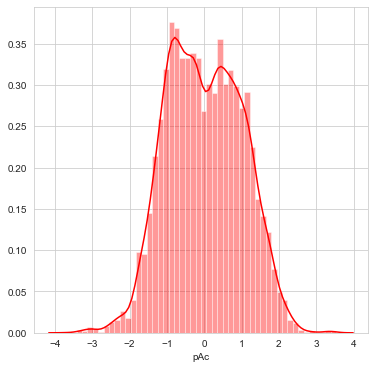

In [82]:
#Plot distribution of the pAc with the density estimation function after scaling
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df2.pAc,color = 'red');
sns.set_style("whitegrid")

In [83]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X2 = df2.drop(columns=['pAc'],axis=1).values
# Get the target vector
y2 = df2["pAc"].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

In [84]:
model2 = svr.fit(X2_train,y2_train)
y2_pred = svr.predict(X2_test)
print(mean_squared_error(y2_test,y2_pred))
print(r2_score(y2_test,y2_pred))

0.14877642935862329
0.8528248887249371


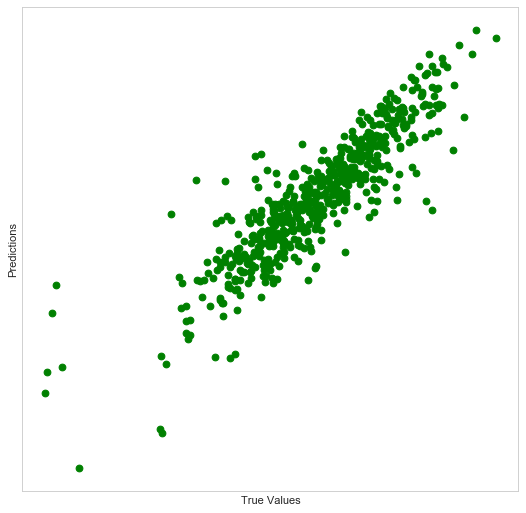

<Figure size 432x288 with 0 Axes>

In [44]:
## The line / model
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y2_test, y2_pred,color='green')
#plt.plot(X_test,pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
plt.savefig('pic1.png')

In [45]:
#valid_pred = svr.predict(X_test_val)
valid_pred2 = model2.predict(X_test_val)
print(mean_squared_error(y_test_val,valid_pred2))
print(r2_score(y_test_val,valid_pred2))

0.31505745019321085
0.6034154962562819


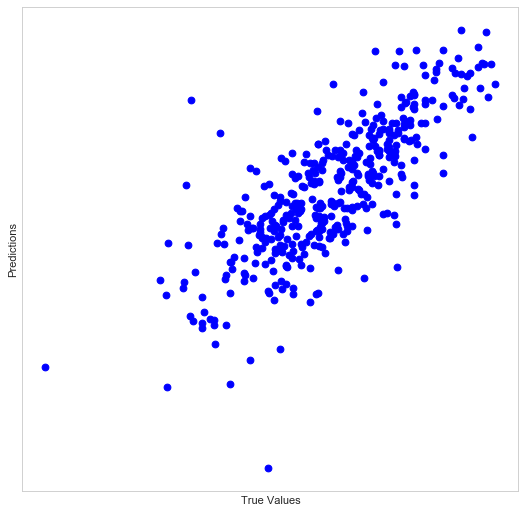

<Figure size 432x288 with 0 Axes>

In [46]:
## The line / model
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y_test_val, valid_pred2,color='blue')
#plt.plot(X_test,pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
plt.savefig('pic2.png')

In [47]:
#Add noise of 0.03 to the dataframe
noise3 = add_gausian(df0,0,0.3)


df3 = pd.concat([df2,noise3])
df3.shape

(2898, 117)

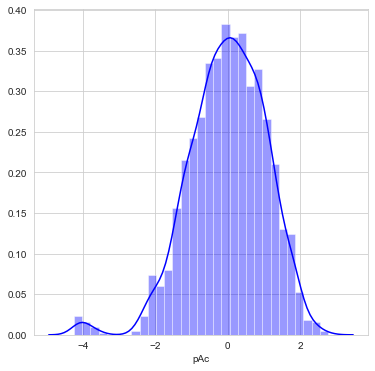

In [48]:
#Plot distribution of the pAc with the density estimation function after scaling
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df2.pAc,color = 'blue');
sns.set_style("whitegrid")

In [49]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X3 = df3.drop(columns=['pAc'],axis=1).values
# Get the target vector
y3 = df3["pAc"].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,random_state=42)

In [50]:
model3 = svr.fit(X3_train,y3_train)
y3_pred = svr.predict(X3_test)
print(mean_squared_error(y3_test,y3_pred))
print(r2_score(y3_test,y3_pred))

0.1971560160763976
0.8194905754390035


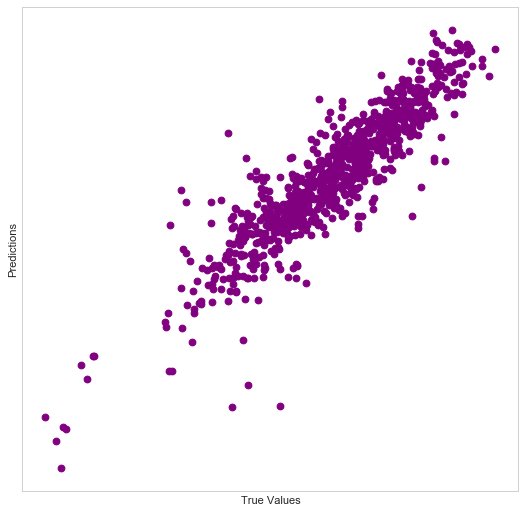

<Figure size 432x288 with 0 Axes>

In [51]:
## The line / model
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y3_test, y3_pred,color='purple')
#plt.plot(X_test,pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
plt.savefig('pic1.png')

In [52]:
#valid_pred = svr.predict(X_test_val)
valid_pred = model3.predict(X_test_val)
print(mean_squared_error(y_test_val,valid_pred))
print(r2_score(y_test_val,valid_pred))

0.31767220421726705
0.6001241253447028


In [53]:
#Add noise of 0.04 to the dataframe
noise = add_gausian(df,0,0.4)
df4 = pd.concat([df3,noise])
df4.shape

(3864, 117)

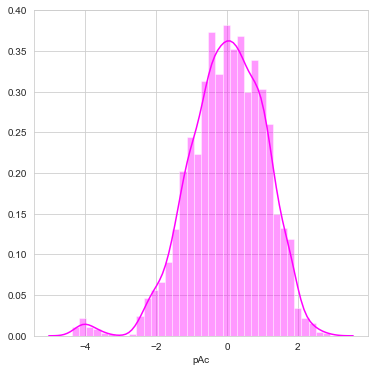

In [54]:
#Plot distribution of the pAc with the density estimation function after scaling
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df3.pAc,color = 'magenta');
sns.set_style("whitegrid")

In [55]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X4 = df4.drop(columns=['pAc'],axis=1).values
# Get the target vector
y4 = df4["pAc"].values
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,random_state=42)

In [56]:
model4 = svr.fit(X4_train,y4_train)
y4_pred = svr.predict(X4_test)
print(mean_squared_error(y4_test,y4_pred))
print(r2_score(y4_test,y4_pred))

0.20160660662866348
0.8233336027661692


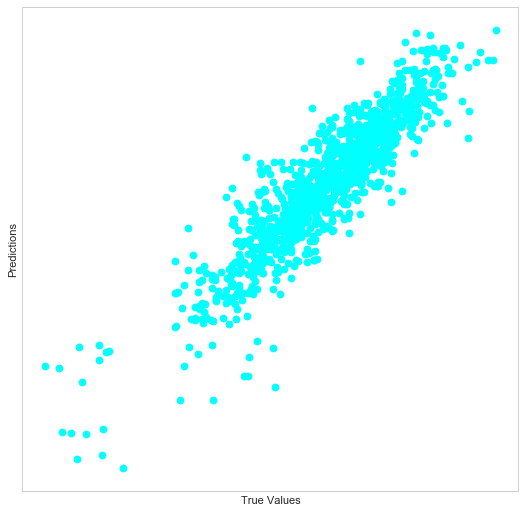

<Figure size 432x288 with 0 Axes>

In [57]:
## The line / model
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y4_test, y4_pred,color='aqua')
#plt.plot(X_test,pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
plt.savefig('pic1.png')

In [58]:
#valid_pred = svr.predict(X_test_val)
valid_pred = model4.predict(X_test_val)
print(mean_squared_error(y_test_val,valid_pred))
print(r2_score(y_test_val,valid_pred))

0.3208431036010041
0.5961326959792033


In [59]:
#Add noise of 0.05 to the dataframe
noise = add_gausian(df0,0,0.5)
df5 = pd.concat([df4,noise])
df5.shape

(4830, 117)

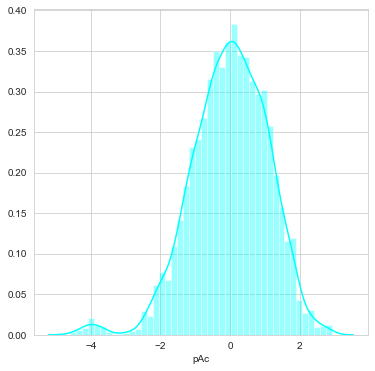

In [60]:
#Plot distribution of the pAc with the density estimation function after scaling
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df5.pAc,color = 'aqua');
sns.set_style("whitegrid")

In [61]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X5 = df5.drop(columns=['pAc'],axis=1).values
# Get the target vector
y5 = df5["pAc"].values
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,random_state=42)

In [ ]:
model5 = svr.fit(X5_train,y5_train)
y5_pred = svr.predict(X5_test)
print(mean_squared_error(y5_test,y5_pred))
print(r2_score(y5_test,y5_pred))

In [ ]:
## The line / model
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y5_test, y5_pred,color='magenta')
#plt.plot(X_test,pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
plt.savefig('pic1.png')

In [ ]:
#valid_pred = svr.predict(X_test_val)
valid_pred = model5.predict(X_test_val)
print(mean_squared_error(y_test_val,valid_pred))
print(r2_score(y_test_val,valid_pred))